In [1]:
# Dependencies and Setup
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

# Data file paths
county_2015_path = "Output/2015_cleaned_all_county.csv"
state_2015_path = "Output/2015_cleaned_state.csv"
county_2017_path = "Output/2017_cleaned_all_county.csv"
state_2017_path = "Output/2017_cleaned_state.csv"

# Read 2015 and 2017 county and state CSVs
county_2015 = pd.read_csv(county_2015_path)
state_2015 = pd.read_csv(state_2015_path)
county_2017 = pd.read_csv(county_2017_path)
state_2017 = pd.read_csv(state_2017_path)

In [2]:
# Display State 2015
state_2015.head()

,State,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,...,OtherTrans,WorkatHome,MeanCommute,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Poverty,ChildPoverty,Unemployment
0,Alabama,4830620,2341093,2489527,193159,3204658,1270556,22007,59324,1089,...,20994,56260,25,1583312,329430,105863,3715,910480,1318475,454470.0
1,Alaska,733375,384160,349215,47860,457438,23611,98381,42323,8638,...,19750,16083,10,240061,88175,22190,634,74612,99617,61944.0
2,Arizona,6641928,3299088,3342840,2015055,3751927,263011,265835,193799,11587,...,77252,156279,21,2230882,412325,166404,5502,1210351,1724490,603931.0
3,Arkansas,2958208,1451913,1506295,203216,2177095,456609,16531,39968,6628,...,15580,40259,22,969630,205337,78614,2406,571519,821223,231176.0
4,California,38421464,19087135,19334329,14746502,14878698,2157932,144676,5192680,133245,...,437377,917120,24,13403787,2381720,1434085,34099,6260461,8451647,3845640.0


In [3]:
# Creating 2015 DF 
gender_15_state = state_2015[["State","TotalPop", "Men", "Women", "IncomePerCap"]]
gender_15_state.head()
state_2015_gender = gender_15_state.copy()

In [10]:
# Generate new DF for 2015 State to add new Percent Difference column between Men and Women. Negative numbers = more women
gender_diff_prcnt_state_15 = (state_2015_gender["Men"] - state_2015_gender["Women"]) / state_2015_gender["TotalPop"] * 100
state_2015_gender['Difference(%)'] = gender_diff_prcnt_state_15
state_2015_gender.head()

,State,TotalPop,Men,Women,IncomePerCap,PercentDiff,Difference(%)
0,Alabama,4830620,2341093,2489527,20780,-3.072773,-3.072773
1,Alaska,733375,384160,349215,30332,4.764957,4.764957
2,Arizona,6641928,3299088,3342840,21052,-0.658724,-0.658724
3,Arkansas,2958208,1451913,1506295,20072,-1.838343,-1.838343
4,California,38421464,19087135,19334329,27902,-0.643375,-0.643375


In [11]:
women_dom_2015 = state_2015_gender.loc[state_2015_gender['Difference(%)']<0]
women_dom_2015.head()

,State,TotalPop,Men,Women,IncomePerCap,PercentDiff,Difference(%)
0,Alabama,4830620,2341093,2489527,20780,-3.072773,-3.072773
2,Arizona,6641928,3299088,3342840,21052,-0.658724,-0.658724
3,Arkansas,2958208,1451913,1506295,20072,-1.838343,-1.838343
4,California,38421464,19087135,19334329,27902,-0.643375,-0.643375
6,Connecticut,3593222,1751607,1841615,37025,-2.504938,-2.504938


In [12]:
men_dom_2015 = state_2015_gender.loc[state_2015_gender['Difference(%)']>0]
men_dom_2015

,State,TotalPop,Men,Women,IncomePerCap,PercentDiff,Difference(%)
1,Alaska,733375,384160,349215,30332,4.764957,4.764957
5,Colorado,5278906,2648667,2630239,27747,0.349087,0.349087
11,Hawaii,1406299,709871,696428,31892,0.955913,0.955913
12,Idaho,1616547,810464,806083,21451,0.271010,0.271010
26,Montana,1014699,510163,504536,25020,0.554549,0.554549
28,Nevada,2798636,1407735,1390901,26317,0.601507,0.601507
34,North Dakota,721640,367963,353677,31900,1.979657,1.979657
42,South Dakota,843190,423477,419713,25334,0.446400,0.446400
45,Utah,2903379,1459229,1444150,22552,0.519360,0.519360
51,Wyoming,579679,295561,284118,29223,1.974024,1.974024


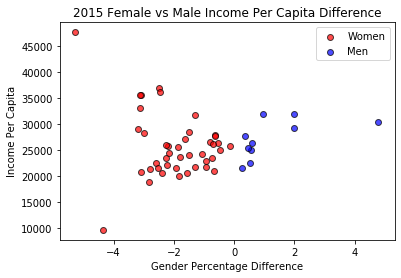

In [14]:
women_percent_diff_2015 = women_dom_2015["Difference(%)"]
women_IPC_2015 = women_dom_2015["IncomePerCap"]
men_percent_diff_2015 = men_dom_2015["Difference(%)"]
men_IPC_2015 = men_dom_2015["IncomePerCap"]
plt.scatter(women_percent_diff_2015, women_IPC_2015, marker="o", facecolors="red", edgecolors="black", alpha=0.7, label="Women")
plt.scatter(men_percent_diff_2015, men_IPC_2015, marker="o", facecolors="blue", edgecolors="black", alpha=0.7, label="Men")
plt.legend(loc="best")
plt.xlabel("Gender Percentage Difference")
plt.ylabel("Income Per Capita")
plt.title("2015 Female vs Male Income Per Capita Difference")

plt.show()

In [15]:
# Creating 2017 DF 
gender_17_state = state_2017[["State","TotalPop", "Men", "Women", "IncomePerCap"]]
gender_17_state.head()
state_2017_gender = gender_17_state.copy()

In [16]:
# Generate new DF for 2015 State to add new Percent Difference column between Men and Women. Negative numbers = more women
gender_diff_prcnt_state_17 = (state_2017_gender["Men"] - state_2017_gender["Women"]) / state_2017_gender["TotalPop"] * 100
state_2017_gender['Difference(%)'] = gender_diff_prcnt_state_17
state_2017_gender.head()

,State,TotalPop,Men,Women,IncomePerCap,Difference(%)
0,Alabama,4850771,2350806,2499965,22180.492537,-3.074954
1,Alaska,738565,386319,352246,31670.551724,4.613406
2,Arizona,6809946,3385055,3424891,22712.200000,-0.584968
3,Arkansas,2977944,1461651,1516293,21449.306667,-1.834890
4,California,38982847,19366579,19616268,30416.482759,-0.640510


In [17]:
women_dom_2017 = state_2017_gender.loc[state_2017_gender['Difference(%)']<0]
women_dom_2017.head()

,State,TotalPop,Men,Women,IncomePerCap,Difference(%)
0,Alabama,4850771,2350806,2499965,22180.492537,-3.074954
2,Arizona,6809946,3385055,3424891,22712.200000,-0.584968
3,Arkansas,2977944,1461651,1516293,21449.306667,-1.834890
4,California,38982847,19366579,19616268,30416.482759,-0.640510
6,Connecticut,3594478,1754046,1840432,39419.125000,-2.403298


In [18]:
men_dom_2017 = state_2017_gender.loc[state_2017_gender['Difference(%)']>0]
men_dom_2017

,State,TotalPop,Men,Women,IncomePerCap,Difference(%)
1,Alaska,738565,386319,352246,31670.551724,4.613406
5,Colorado,5436519,2731315,2705204,29647.046875,0.480289
11,Hawaii,1421658,713981,707677,33930.600000,0.443426
12,Idaho,1657375,830627,826748,23335.000000,0.234045
26,Montana,1029862,517860,512002,27103.196429,0.568814
28,Nevada,2887725,1450091,1437634,28215.352941,0.431378
34,North Dakota,745475,382121,363354,34084.226415,2.517455
42,South Dakota,855444,430587,424857,27241.606061,0.669828
45,Utah,2993941,1506614,1487327,24433.758621,0.644201
51,Wyoming,583200,298301,284899,30665.434783,2.298011


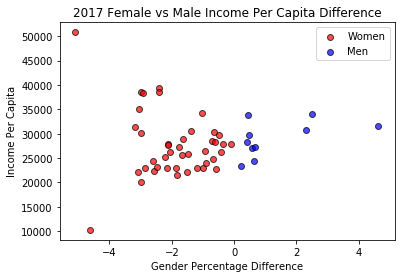

In [19]:
women_percent_diff_2017 = women_dom_2017["Difference(%)"]
women_IPC_2017 = women_dom_2017["IncomePerCap"]
men_percent_diff_2017 = men_dom_2017["Difference(%)"]
men_IPC_2017 = men_dom_2017["IncomePerCap"]
plt.scatter(women_percent_diff_2017, women_IPC_2017, marker="o", facecolors="red", edgecolors="black", alpha=0.7, label="Women")
plt.scatter(men_percent_diff_2017, men_IPC_2017, marker="o", facecolors="blue", edgecolors="black", alpha=0.7, label="Men")
plt.legend(loc="best")
plt.xlabel("Gender Percentage Difference")
plt.ylabel("Income Per Capita")
plt.title("2017 Female vs Male Income Per Capita Difference")

plt.show()